In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
data = pd.read_csv('bitcoinfinal+(4).csv', header=None)
data.columns=['months','price']
data.set_index('months', inplace=True)
data.head(50)

,price
months,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


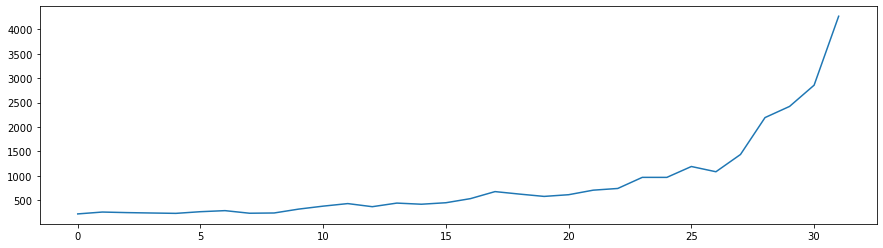

In [3]:
plt.figure(figsize=(15,4))
plt.plot(data['price'])

In [4]:
train = data[:29]
test = data[29:]

In [5]:
data.shape

(32, 1)

In [6]:
train.head(50)

,price
months,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


In [7]:
train.shape, test.shape

((29, 1), (3, 1))

In [8]:
test.head(50)

,price
months,
29,2420.7
30,2856.0
31,4268.8


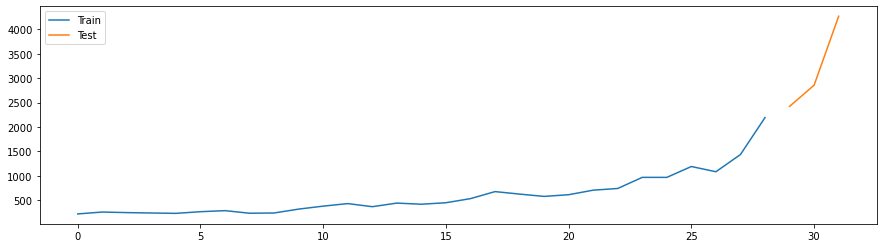

In [9]:
plt.figure(figsize=(15,4))
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'],label = 'Test')
plt.legend(loc='best')
plt.show()

In [10]:
y_hat_fore = test.copy()
y_hat_fore['naive'] = train['price'][28]
y_hat_fore['simple_avg'] = train['price'].mean()

In [11]:
y_hat_fore.head()

,price,naive,simple_avg
months,,,
29,2420.7,2191.8,595.751724
30,2856.0,2191.8,595.751724
31,4268.8,2191.8,595.751724


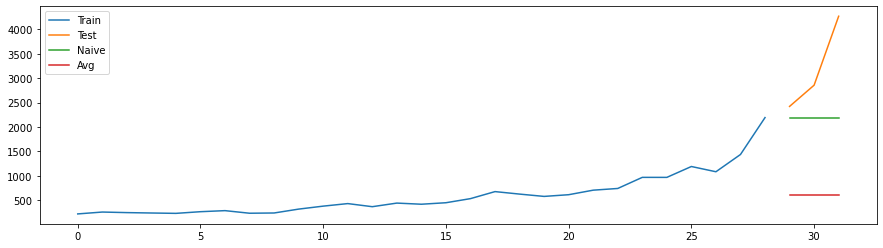

In [12]:
plt.figure(figsize=(15,4))
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'],label = 'Test')
plt.plot(y_hat_fore['naive'], label = 'Naive')
plt.plot(y_hat_fore['simple_avg'], label='Avg')
plt.legend(loc='best')
plt.show()

In [13]:
def rsme_mape(col_name):
    rsme = np.sqrt(mean_squared_error(y_hat_fore['price'], y_hat_fore[col_name])).round(2)
    mape = mean_absolute_percentage_error(y_hat_fore['price'], y_hat_fore[col_name]).round(2)
    return rsme, mape

In [14]:
rsme, mape = rsme_mape('naive')
rsme,mape

(1265.9, 0.27)

In [15]:
rsme, mape = rsme_mape('simple_avg')
rsme,mape

(2703.73, 0.8)

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

In [63]:
model = SimpleExpSmoothing(train['price'])
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 217.4,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
y_hat_fore['ses_forecast'] = model_fit.forecast(3)

In [65]:
rsme, mape = rsme_mape('ses_forecast')
rsme,mape

(1268.86, 0.27)

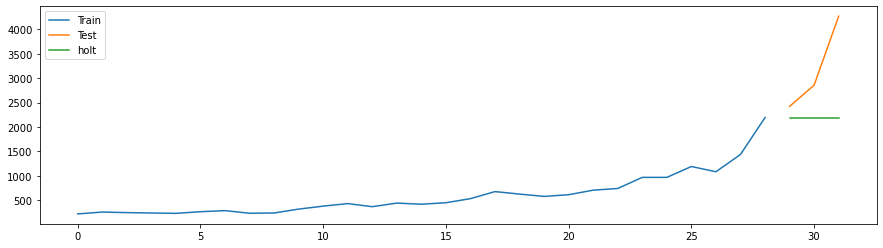

In [66]:
plt.figure(figsize=(15,4))
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'],label = 'Test')
plt.plot(y_hat_fore['ses_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [52]:
y_hat_avg = data.copy()
y_hat_avg['roll_12'] = data['price'].rolling(12).mean()
y_hat_avg['roll_06'] = data['price'].rolling(6).mean()
y_hat_avg['roll_03'] = data['price'].rolling(3).mean()
y_hat_avg = y_hat_avg.fillna(0)

In [53]:
rsme_12 = np.sqrt(mean_squared_error(y_hat_avg['price'], y_hat_avg['roll_12'])).round(2)
mape_12 = mean_absolute_percentage_error(y_hat_avg['price'], y_hat_avg['roll_12']).round(2)

rsme_06 = np.sqrt(mean_squared_error(y_hat_avg['price'], y_hat_avg['roll_06'])).round(2)
mape_06 = mean_absolute_percentage_error(y_hat_avg['price'], y_hat_avg['roll_06']).round(2)

rsme_03 = np.sqrt(mean_squared_error(y_hat_avg['price'], y_hat_avg['roll_03'])).round(2)
mape_03 = mean_absolute_percentage_error(y_hat_avg['price'], y_hat_avg['roll_03']).round(2)

In [54]:
rsme_12, mape_12

(675.28, 0.58)

In [55]:
rsme_06, mape_06

(463.92, 0.32)

In [56]:
rsme_03, mape_03

(257.34, 0.16)

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [75]:
model = ExponentialSmoothing(np.array(train['price']))
model_fit = model.fit(optimized=True)

In [76]:
model_fit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 217.4,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
model_fit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995,True
initial_level,l.0,217.400,True


In [78]:
y_hat_new = test.copy()
y_hat_new['forecast'] = model_fit.forecast(3)

In [79]:
mean_absolute_percentage_error(y_hat_new['price'], y_hat_new['forecast']).round(2)

0.27

In [88]:
model = ExponentialSmoothing(np.array(train['price']), 
                             seasonal_periods=3, 
                             trend='additive', 
                             seasonal=None)
model_fit = model.fit(smoothing_level=0.9, 
                      smoothing_slope=0.01, 
                      optimized=False)

In [89]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(3)

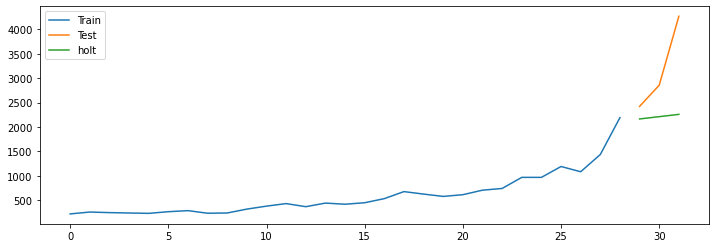

In [90]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label = 'Test')
plt.plot(y_hat_holt['holt_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [91]:
mean_absolute_percentage_error(y_hat_holt['price'], y_hat_holt['holt_forecast']).round(2)

0.27

In [92]:
model = ExponentialSmoothing(np.array(train['price']), 
                             seasonal_periods=3, 
                             trend='multiplicative', 
                             seasonal=None)
model_fit = model.fit(smoothing_level=0.9, 
                      smoothing_slope=0.01, 
                      optimized=False)

In [93]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(3)

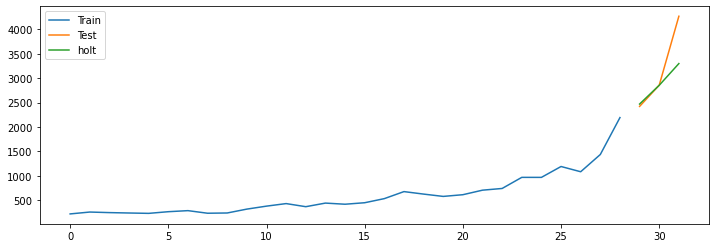

In [94]:
plt.figure(figsize=(12,4))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label = 'Test')
plt.plot(y_hat_holt['holt_forecast'], label = 'holt')
plt.legend(loc='best')
plt.show()

In [95]:
mean_absolute_percentage_error(y_hat_holt['price'], y_hat_holt['holt_forecast']).round(2)

0.08